# 用户消费行为分析

## 项目介绍

今天我们要对用户消费行为进行分析，用户消费行为数据分析项目旨在利用大量用户消费数据，通过数据挖掘和分析技术，深入了解用户在产品或服务上的消费行为模式和习惯。通过对数据的挖掘和分析，该项目可以帮助企业更好地了解其用户，优化产品或服务，提高用户满意度，增加用户忠诚度，并在竞争激烈的市场中获得优势

## 需求分析

1.数据收集：项目的第一步是收集大量的用户消费数据。这些数据可以包括购买记录、浏览行为、搜索行为、点击率、用户反馈等。数据可以来自企业已有的数据库，也可以通过第三方数据提供商获得。

2.数据清洗与预处理：收集到的数据可能存在错误、缺失或重复项，需要进行数据清洗和预处理，确保数据的准确性和完整性，使其适合后续的分析工作。

3.数据探索性分析：在进行深入分析之前，需要对数据进行探索性分析，通过可视化和统计方法发现数据中的规律和趋势，发现潜在的模式和异常情况。

4.用户消费行为模式分析：利用数据挖掘技术，对用户的消费行为进行建模和分析，找出用户在购买产品或使用服务时的常见模式和习惯，例如购买的时间、频率、金额等。

5.用户群体划分：根据用户的消费行为和特征，将用户划分为不同的群体或细分市场。这有助于企业更好地了解不同群体的需求和偏好，针对性地推出营销策略。

6.用户留存和流失分析：分析用户的留存和流失情况，找出导致用户流失的原因，并采取措施提高用户的留存率。

7.个性化推荐系统：基于用户的消费行为模式和偏好，开发个性化推荐系统，向用户推荐符合其兴趣的产品或服务，提高销售和用户满意度。

8.可视化与报告：将分析结果以可视化的方式呈现，例如图表、报表和仪表盘，帮助企业管理层更直观地理解数据并做出决策。

9.数据保密与安全：在整个项目过程中，保障用户数据的隐私和安全，确保符合相关法律法规和企业内部的数据保护政策。

10.持续优化：数据分析是一个持续优化的过程，项目团队应与业务团队保持紧密合作，根据反馈和结果不断优化分析模型和推荐系统，确保项目的长期价值。

通过以上需求分析，用户消费行为数据分析项目将帮助企业深入了解用户需求，优化产品或服务，提高用户满意度和忠诚度，从而在竞争激烈的市场中取得竞争优势。

## 一、导入数据，初步分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')
#sep:'\s+':匹配任意个空格
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


分析输出结果可得：

1.该数据数据量较大，但数据很完整，不存在缺失值<br>
2.日期为int类型，格式需要转换<br>
3.存在同一个用户一天内购买多次行为

In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


分析输出结果可得：

1. 用户平均每笔订单购买2.4个商品，标准差2.3，稍微有点波动，属于正常。
然而75%分位数的时候，说明绝大多数订单的购买量都不多，围绕在2~3个产品左右；
2. 购买金额，反映出大部分订单消费金额集中在中小额，30~45左右

### 数据预处理

由上述观察得出的结论，对数据日期做如下调整：
首先转换日期格式，放入‘order_date"列中，代码如下：

In [6]:
# format参数：按照指定的格式去匹配要转换的数据列。<br>
# %Y:四位的年份1994   %m:两位月份05    %d:两位日期31<br>
# 还有以下参数设置：
# %y：两位年份94   %h:两位小时09   %M：两位分钟15 %s:两位秒<br>
df['order_date']=pd.to_datetime(df['order_dt'],format='%Y%m%d')
# 为了方便后面按月分析数据，添加新列“month"，存放精度为月份的日期
df['month']=df['order_date'].values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


## 二、用户整体消费趋势分析（按月份）

分别按月份统计产品购买数量、消费金额、消费次数、消费人数，具体代码如下：|

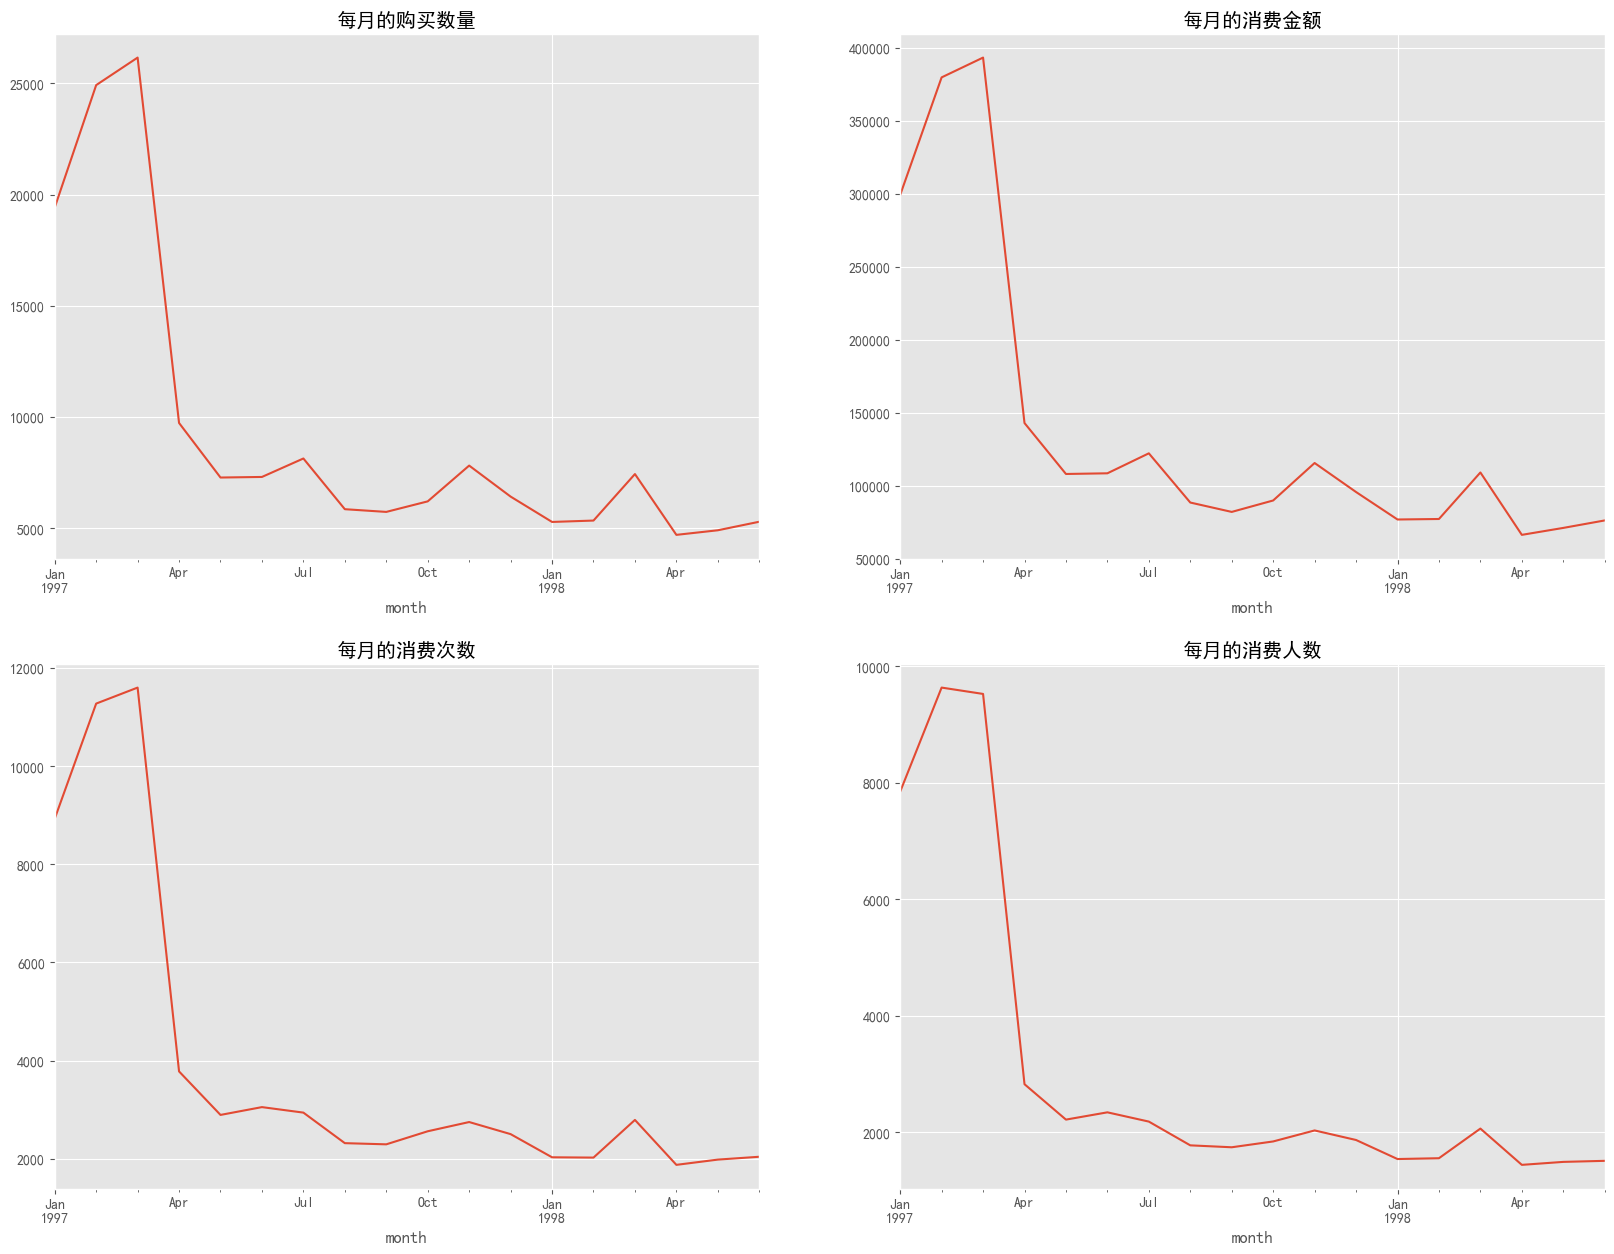

In [8]:
plt.style.use('ggplot')  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,15)) 
plt.subplot(221) # 绘子图 两行两列，占据第一个位置
# 每月的购买数量
df.groupby(by='month')['order_products'].sum().plot() # 默认折线图
plt.title('每月的购买数量')
# 每月的消费金额
plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('每月的消费金额')
# 每月的消费次数
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('每月的消费次数')
# 每月的消费人数
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('每月的消费人数')
plt.show()

从上述图像可以看出，1月至3月期间，无论是销量、消费金额、订单数量还是消费人数，都明显较高，且呈现上升趋势。

然而，从3月起，各项数据迅速下降并趋于稳定。

前三个月订单数约为10000单，消费人数在8000至10000人之间，而随后月份的订单数降至2500单左右，消费人数则维持在2000人以下。

这段时间的消费情况异常活跃，可能是因为春节前后的消费需求增加，以及公司加大了促销力度。

然而，消费人数从2月开始下降并且趋于平稳，可能是因为商品的使用体验感较好，部分新顾客转化为老顾客。

## 三、用户的个体消费分析

### 1. 用户消费金额、消费次数（产品数量）描述统计

In [9]:
df1 = df.copy() # 创建数据的副本
df1 = df1.drop(['order_date','month'],axis=1) # 去掉日期和月份列
user_grouped = df1.groupby(by='user_id').sum() #用户ID分组并且求和
print(user_grouped.describe())
print('用户数量:',len(user_grouped))

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量: 23570


从用户角度来看：
用户数量为23570人，平均每个用户购买7个产品，而中位数仅为3，最大购买量高达1033。
由于平均值明显大于中位数，意味着这是典型的右偏分布现象，表明少数高消费用户拉高了整体的平均购买量。

从消费金额角度分析：
用户的平均消费金额为106，中位数为43，且有个别土豪用户消费高达13990。
结合分位数数据来看，平均数与75%分位数接近，说明这也是一个典型的右偏分布。
少数高消费用户显著影响了整体的消费水平，使得整体的平均消费金额维持在106。

### 2.绘制每个用户的产品的购买量与消费金额散点图

<AxesSubplot: xlabel='order_products', ylabel='order_amount'>

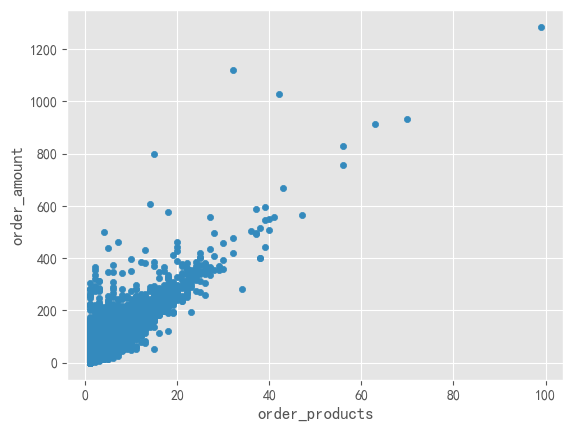

In [10]:
df.plot(kind='scatter',x='order_products',y='order_amount')

从上图的散点图可以看出，
用户的消费金额与购买数量呈现出一定的正相关性的，每个商品的平均价格约为15元。
尽管存在少量极值订单（消费金额超过1000或购买数量超过60），但这些极值对整体样本的影响较小，基本可以忽略不计。

### 3.用户消费分布分析

<AxesSubplot: ylabel='Frequency'>

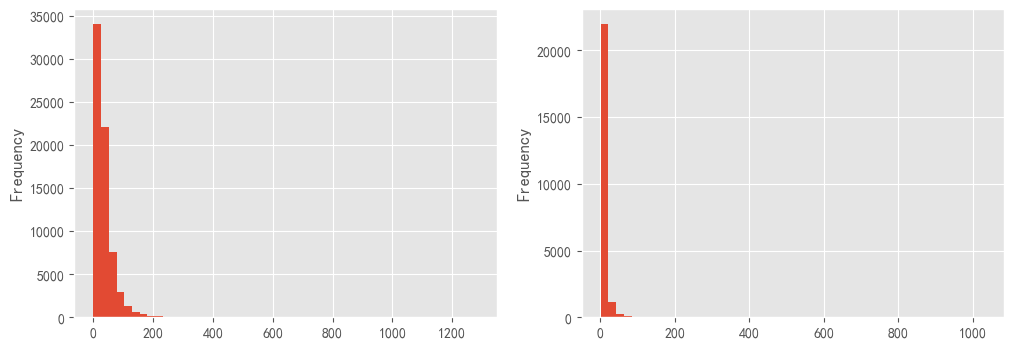

In [11]:
plt.figure(figsize=(12,4)) 
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist',bins=50)  #bins:区间分数，影响柱子的宽度，值越大柱子越细。宽度=（列最大值-最小值）/bins
#消费金额在100以内的订单占据了绝大多数

plt.subplot(122)
plt.xlabel('每个uid购买的数量')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist',bins=50)

从图二可以看出，绝大多数用户的购买数量集中在50个以内。
结合两幅图来看，用户主要集中在低消费群体，且购买数量小于50的用户占据了大多数（这在电商领域是普遍现象）。
总体结论是，消费金额在100元以内的订单占绝大多数，且用户的购买数量较少，集中在50个以内。

### 4.用户累计消费金额占比分析（用户的贡献度）

进行用户分组，取出消费金额，进行求和，排序，重置索引

In [12]:
# 每个用户的消费金额
user_cumsum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
# 每个用户消费金额累加
user_cumsum['amount_cumsum']=user_cumsum['order_amount'].cumsum()
amount_total = user_cumsum['amount_cumsum'].max() #消费金额总值
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1)  #前xx名用户的总贡献率
user_cumsum.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


<AxesSubplot: >

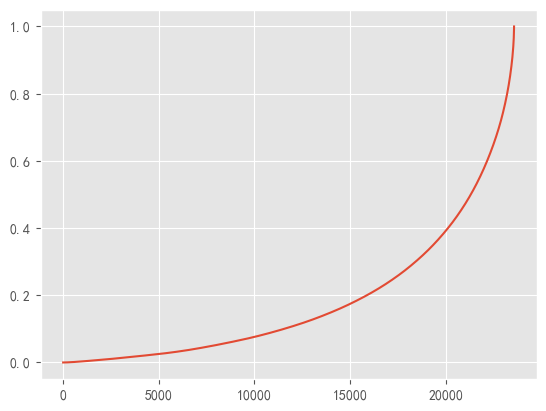

In [13]:
user_cumsum['prop'].plot() # 绘制累计消费金额占比的变化曲线

由图分析可知，前20000名用户贡献总金额的40%，剩余3500名用户贡献了60%。（2/8原则）

## 四、用户消费行为分析

### 1.首购时间分析

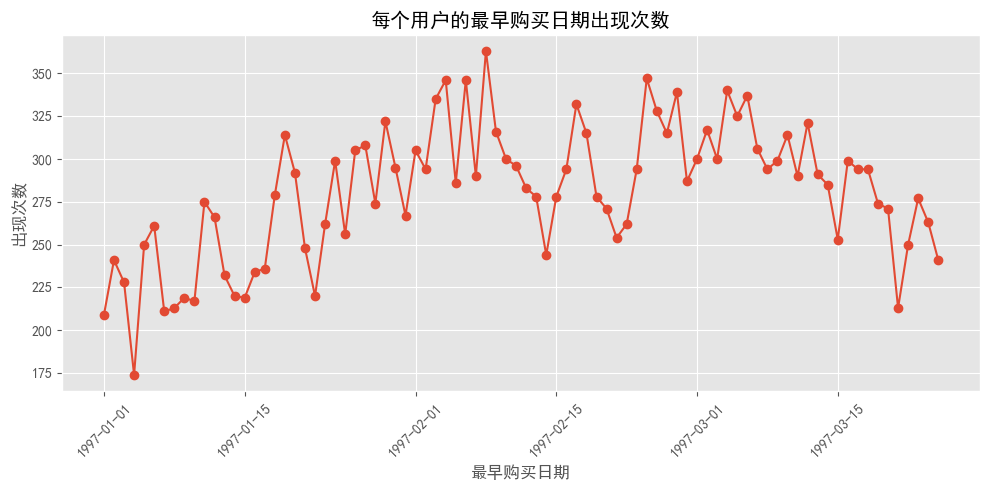

In [14]:
earliest_purchase = df.groupby('user_id')['order_date'].min() # 每个用户的首购时间
earliest_purchase_counts = earliest_purchase.value_counts() # 统计每个日期的用户首购数量
# 按日期排序
earliest_purchase_counts_sorted = earliest_purchase_counts.sort_index()
# 提取 x 和 y 数据
x = earliest_purchase_counts_sorted.index  # X轴为日期
y = earliest_purchase_counts_sorted.values  # Y轴为每个日期的用户首购数量
# 绘制线图
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-')  # 使用 linestyle='-' 来连接点
plt.title('每个用户的最早购买日期出现次数')
plt.xlabel('最早购买日期')
plt.ylabel('出现次数')
plt.xticks(rotation=45)  # 旋转 x 轴标签，以便它们更容易阅读
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

从图中可以看出，用户首购时间集中二月初，这可能是公司加大了促销力度，吸引来很多新用户。

整体来看，在2月份前新客呈上升趋势，2月份后呈现下降趋势，这可能是公司的推广力度或者价格调整所致。

### 2.最后一次购买时间分析

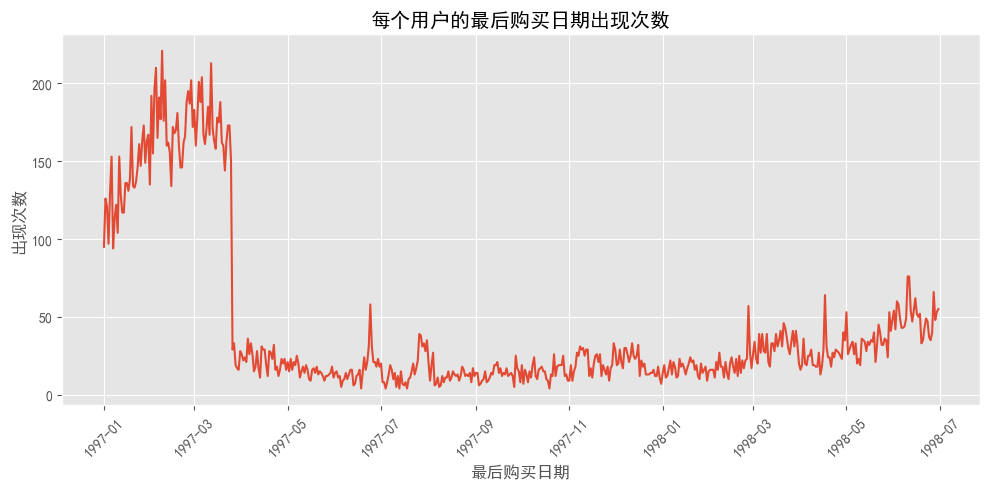

In [15]:
# 计算每个用户的最后购买日期
latest_purchase = df.groupby('user_id')['order_date'].max()
# 计算最后购买日期的出现次数
latest_purchase_counts = latest_purchase.value_counts()
# 按日期排序
latest_purchase_counts_sorted = latest_purchase_counts.sort_index()

# 提取 x 和 y 数据
x = latest_purchase_counts_sorted.index
y = latest_purchase_counts_sorted.values
# 绘制线图
plt.figure(figsize=(10, 5))
plt.plot(x, y, linestyle='-')  # 使用 linestyle='-' 来连接点
plt.title('每个用户的最后购买日期出现次数')
plt.xlabel('最后购买日期')
plt.ylabel('出现次数')
plt.xticks(rotation=45)  # 旋转 x 轴标签，以便它们更容易阅读
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

大多数用户的最后一次购买时间集中在前3个月，表明忠诚用户较少，结合之前的图可知，很多用户都是一次性用户。

### 3.用户分层分析

构建RFM模型：R代表最近购买日期，F表示购买次数（频率），M为购买金额

In [16]:
#透视表的使用（index:相当于groupby,values:取出的数据列，aggfunc:key值必须存在于values列中，并且必须跟随有效的聚合函数）
rfm = df.pivot_table(index='user_id',
                    values=['order_products','order_amount','order_date'],
                    aggfunc={
                        'order_date':'max',# 最后一次购买
                        'order_products':'sum',# 消费频次
                        'order_amount':'sum'  #消费总金额
                        })
# 用每个用户的最后一次购买时间-日期列中的最大值，最后再转换成天数，小数保留一位
rfm['R'] = -(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D')  # 计算R值（最近一次消费的间隔天数）
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [17]:
# RFM计算方式：每一列数据减去数据所在列的平均值，有正有负，根据结果值与1做比较，如果>=1,设置为1，否则0
def rfm_func(x):  #x:分别代表每一列数据
    level = x.apply(lambda x:'1' if x>=1 else '0')
    label = level['R'] + level['F'] + level['M']  #举例：100    001
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
        
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户


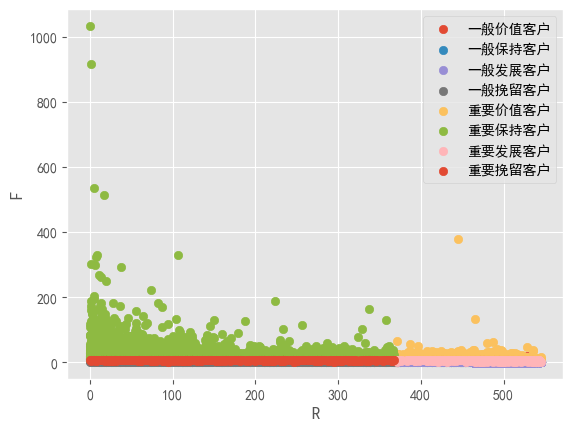

In [18]:
for label,grouped in rfm.groupby('label'):
    x=grouped['R'] # 单个用户的购买数量
    y=grouped['F'] #最近一次购买时间与98年7月的相差天数
    plt.scatter(x,y,label=label)
plt.legend() # 显示图例
plt.xlabel('R')
plt.ylabel('F')
plt.show()

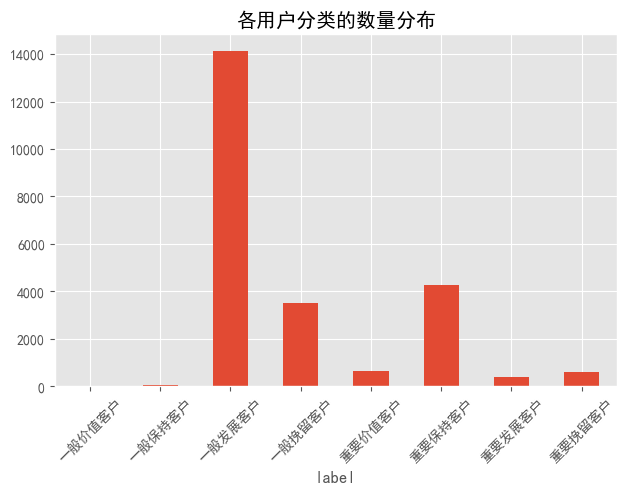

In [19]:
rfm.groupby('label').size().plot(kind='bar')  # 绘制每个用户分类的数量柱状图
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('各用户分类的数量分布')
plt.show()

一般用户占据绝大部分，23570名用户中只有4000名重要保持用户，应制定一些策略，提升一般用户转化成重要用户的转化率

### 4.新老，活跃，回流用户分析

新用户定义为首次进行消费的客户。
活跃用户是指在某一时间窗口内有过消费的老用户。
不活跃用户则是在该时间窗口内没有消费的老用户。
回流用户相当于回头客，分为自主回流和人工回流两种类型：
         自主回流是指顾客主动回流，人工回流则是由人为干预促成的回流行为。

处理数据时，可以将用户分为以下几类：新用户、活跃用户、不活跃用户、回流用户以及未消费用户。

In [20]:
pivoted_counts=df.pivot_table(index='user_id',
                              columns='month',
                              values='order_dt',
                              aggfunc='count').fillna(0) # 将nan填充为0
# 由于浮点数不直观，将其转换成是否消费，用 0、1表示
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0) # 将订单数转化为二进制形式，表示某月是否有购买行为

# 判断是否是新用户、活跃用户、不活跃用户、回流用户
def active_status(data): #data：每一行数据（共18列）
    status = [] #存储用户18个月的状态（new|active|unactive|return|unreg）
    for i in range(18):
        #判断本月没有消费==0
        if data[i] ==0:
            if len(status)==0: #前几个月没有任何记录（也就是97年1月==0）
                status.append('unreg')  
            else:#之前的月份有记录（判断上一个月状态）
                if status[i-1] =='unreg':#一直没有消费过
                    status.append('unreg')
                else:#上个月的状态可能是：new|active|unative|reuturn
                    status.append('unactive')
        else:#本月有消费==1
            if len(status)==0:
                status.append('new') #第一次消费
            else:#之前的月份有记录（判断上一个月状态）
                if status[i-1]=='unactive':
                    status.append('return') #前几个月不活跃，现在又回来消费了，回流用户
                elif  status[i-1]=='unreg':
                    status.append('new') #第一次消费
                else:#new|active
                    status.append('active') #活跃用户
            
    return pd.Series(status,df_purchase.columns) #值：status,列名：18个月份

purchase_states = df_purchase.apply(active_status,axis=1) #得到用户分层结果
purchase_states.head()

C:\Users\97059\AppData\Local\Temp\ipykernel_3120\188776828.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0) # 将订单数转化为二进制形式，表示某月是否有购买行为
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\188776828.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] ==0:


month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


C:\Users\97059\AppData\Local\Temp\ipykernel_3120\2870054662.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_status_ct=purchase_states.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\2870054662.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_status_ct=purchase_states.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\2870054662.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_status_ct=purchase_states.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\2870054662.py:2: FutureWarning: pandas.value_counts is deprecated 

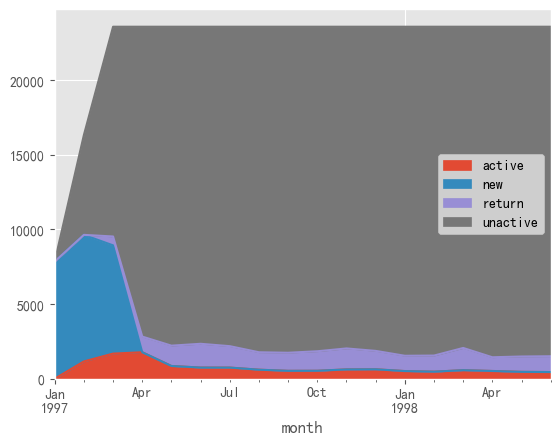

In [21]:
# 用nan代替unreg
purchase_status_ct=purchase_states.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_ct.T.fillna(0).plot.area()
plt.show()

从图中可以看出，灰色区域代表不活跃用户，占比较大。
前三个月，红色的活跃用户和蓝色的新用户呈现上升趋势，这可能是由于促销活动的影响。
3月之后，紫色回流用户和红色活跃用户的数量开始下降，并逐渐趋于稳定。
此外，3月之后新用户的数量几乎没有显著增长。
值得注意的是，回流用户主要在四月后出现，并且表现出稳定趋势，成为产品的重要客户群体。

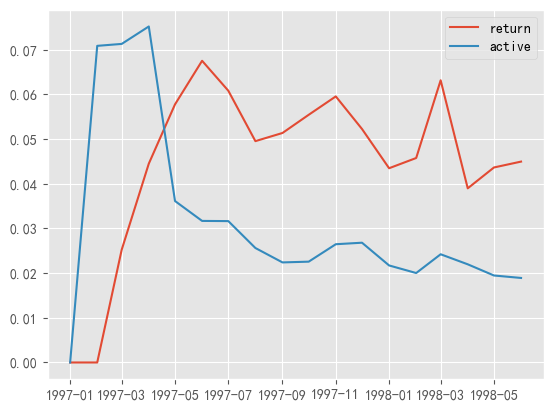

In [22]:
rate=purchase_status_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
# 回流用户占比
plt.plot(rate['return'],label='return')
# 活跃用户占比
plt.plot(rate['active'],label='active')
plt.legend()
plt.show()

1. **回流用户**：前六个月回流用户比例上升，之后呈下降趋势，平均维持在5%左右。
2. **活跃用户**：前四个月活跃用户大量增长，推测是由于活动吸引了大量新用户。四月份之后，活跃用户开始下降，平均维持在约2.5%。
3. **网站运营稳定后**：回流用户的占比始终高于活跃用户。

### 5.用户购买周期

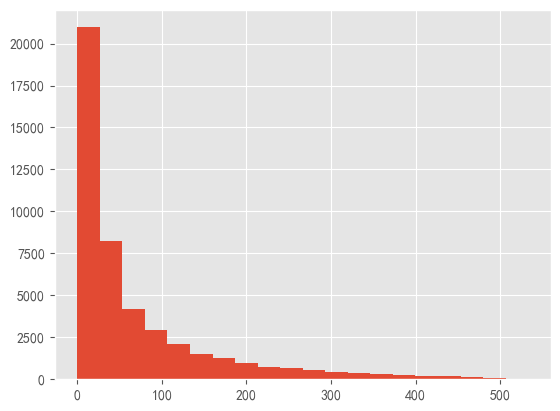

In [23]:
order_diff=df.groupby(by='user_id').apply(lambda x:x['order_date']-x['order_date'].shift()) # 当前订单日期-上一次订单日期
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
plt.show()

从图中可以看出，
用户的平均消费周期为68天，大多数用户的消费周期低于100天，呈现典型的长尾分布。
只有少数用户的消费周期超过200天，属于不积极消费的用户。

建议：
针对这部分不积极消费的用户，可以在其消费后3天左右进行电话回访或发送短信，并通过赠送优惠券等方式，刺激其增加消费频率。

### 6.用户生命周期

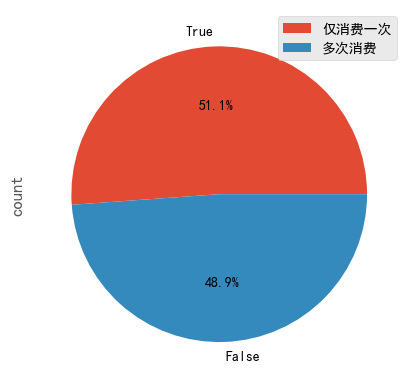

In [24]:
user_life=df.groupby(by='user_id')['order_date'].agg(['min','max'])
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%') # 格式化成1位小数
plt.legend(['仅消费一次','多次消费'])

一半以上的用户仅仅消费了一次，说明运营不利，留存率不好

In [25]:
print((user_life['max']-user_life['min']).describe()) # 生命周期分析

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object


用户的平均生命周期为134天，但中位数为0，
这再次验证了大多数用户只消费过一次，表明低质量用户占比较大。

然而，75%分位数之后的用户生命周期超过294天，属于核心用户群体，需要重点维护与培育。

Text(0, 0.5, '用户人数')

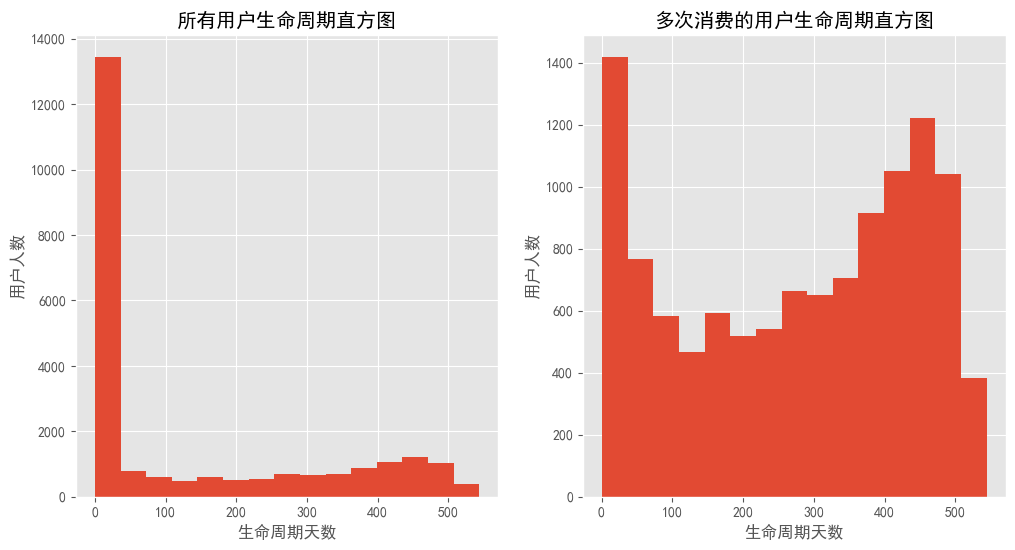

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

plt.subplot(122)
u_1 = (user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)
plt.title('多次消费的用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

对比可知，第二幅图过滤掉了生命周期为0的用户，呈现出双峰结构。
尽管仍有部分用户的生命周期接近0天，但相比第一幅图，情况有所改善。
这些用户虽然进行了多次消费，但未能形成长期消费习惯，属于普通用户，可以针对这类群体开展有针对性的营销推广活动。

此外，少部分用户的生命周期集中在300至500天之间，属于忠诚客户，需要加强维护和投入，确保他们的长期留存和持续消费。

### 7. 复购率和回购率分析

**复购率分析**
计算方式：在自然月内，购买多次的用户在总消费人数中的占比（若客户在同一天消费了多次，也称之复购用户）
消费者有三种：消费记录>=2次的；消费中人数；本月无消费用户；
复购用户:1 
非复购的消费用户： 0 
自然月没有消费记录的用户： NAN(不参与count计数)

C:\Users\97059\AppData\Local\Temp\ipykernel_3120\115077227.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN  if x==0 else 0)


<AxesSubplot: xlabel='month'>

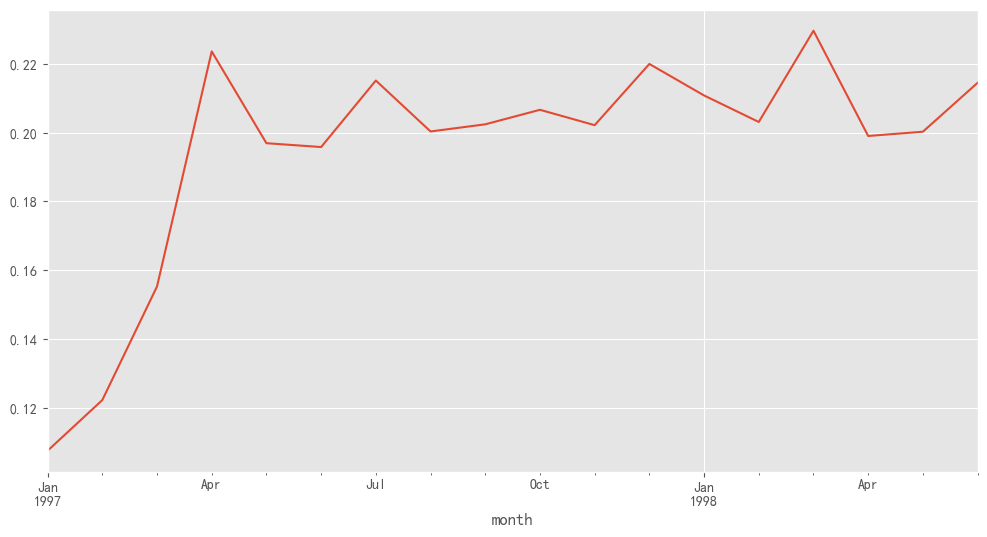

In [27]:
purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN  if x==0 else 0)
purchase_r.head()
#purchase_r.sum() :求出复购用户
#purchase_r.count():求出所有参与购物的用户（NAN不参与计数）
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))

前三个月的复购率逐步上升，随后趋于平稳，维持在20%至22%之间。
前三个月复购率较低的原因可能是由于大量新用户仅进行一次购买，导致整体复购率受到影响。

**回购率分析**
计算方式：在一个时间窗口内进行了消费，在下一个窗口内又进行了消费

C:\Users\97059\AppData\Local\Temp\ipykernel_3120\35444361.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\35444361.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 1:
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\35444361.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i+1]==1:
C:\Users\97059\AppData\Local\Temp\ipykernel_3120\35444361.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

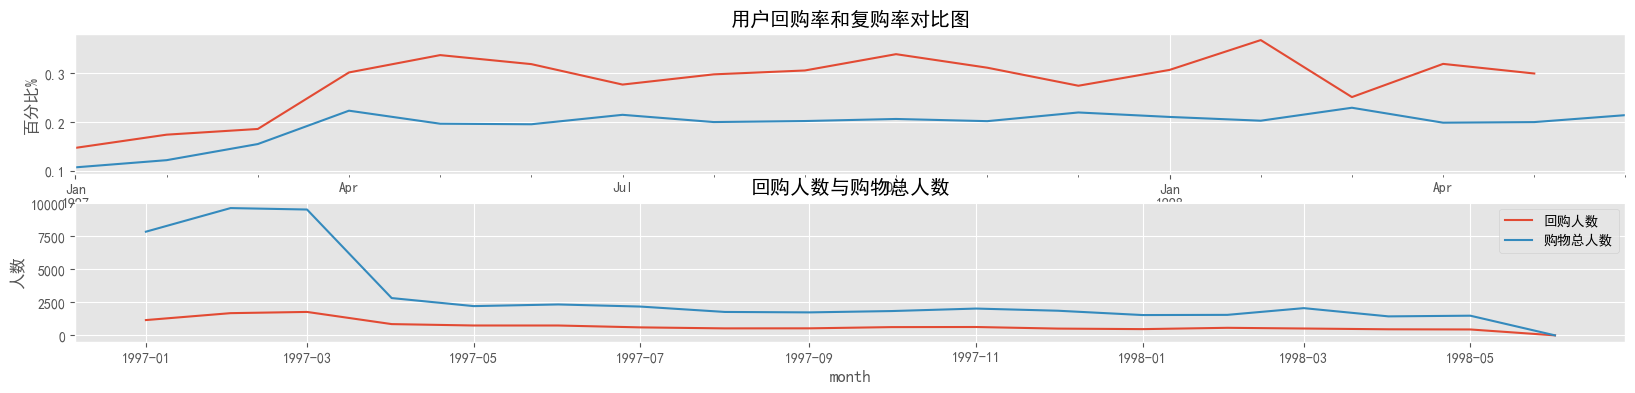

In [28]:
# 由于浮点数不直观，将其转换成是否消费，用 0、1表示
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)
def purchase_back(data):
    status = [] #存储用户回购率状态
    #1:回购用户   0：非回购用户（当前月消费了，下个未消费）   NaN:当前月份未消费
    for i in range(17):
        #当前月份消费了
        if data[i] == 1:
            if data[i+1]==1:
                status.append(1) #回购用户
            elif data[i+1] == 0: #下个月未消费
                status.append(0)
        else: #当前月份未进行消费
            status.append(np.NaN)
    status.append(np.NaN) #填充最后一列数据
    return pd.Series(status,df_purchase.columns)

purchase_b=df_purchase.apply(purchase_back,axis=1)

# 回购率可视化
plt.figure(figsize=(20,4))
plt.subplot(211)
# 回购率,nan不参与count计算
(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
# 复购率
purchase_r=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.ylabel('百分比%')
plt.title('用户回购率和复购率对比图')

# 回购人数与购物总人数
plt.subplot(212)
plt.plot(purchase_b.sum(),label='回购人数')
plt.plot(purchase_b.count(),label='购物总人数')
plt.title('回购人数与购物总人数')
plt.ylabel('人数')
plt.xlabel('month')
plt.legend()

从回购率来看，稳定后保持在30%左右，波动性较大。
而复购率则低于回购率，稳定后在20%左右，波动性较小。
前三个月，无论是回购率还是复购率，都呈现出上升趋势，说明新用户需要一定时间才能转化为回购或复购用户。

结合新老客户的分析发现，新客户的忠诚度明显低于老客户。
前三个月购物总人数远远大于回购人数，主要原因是许多新用户在1月份进行了首次购买。
三个月后，回购人数和购物总人数趋于稳定，回购人数维持在1000左右，而购物总人数则稳定在2000左右。

### 结论

1. **整体趋势**：按年月份来看，销量和销售额在1至3月份相对较高，随后迅速下降，可能与这段时间的大力促销或商品的季度属性有关。

2. **用户个体特征**：每笔订单的金额和购买量主要集中在较低区间，用户多以小金额、小批量的方式进行购买。对于这类用户群体，可以通过丰富产品线和增加促销活动来提高转化率和购买率。

3. **消费总额和购买总量**：大部分用户的消费总额和购买总量集中在低端水平，呈现典型的长尾分布。这与用户需求相关，可以通过赋予商品更多文化价值，增强其社交属性，进而提升用户的价值需求。

4. **用户消费周期**：二次及以上消费的用户平均消费周期为68天。因此，在50至60天期间，应通过针对性召回措施，如10天内的满意度回访、30天发放优惠券、55天提醒优惠券使用等，刺激用户再次消费。

5. **用户生命周期**：二次及以上消费用户的平均生命周期为276天，用户生命周期分布在20天内及400至500天之间。对于生命周期在20天内的用户，应通过引导促进其形成消费习惯，以延长其生命周期；对于100至400天的用户，也应根据其特性推出针对性的营销活动，促进持续消费。

6. **复购率与回购率**：新客户的复购率约为12%，老客户复购率约为20%；新客户的回购率约为15%，老客户回购率约为30%。需要通过积极的营销策略，推动新老客户的再次消费及持续消费。

7. **用户质量**：用户消费呈现一定规律性，大多数用户的消费集中在2000元以下，符合“2/8法则”：消费排名前20%的用户贡献了80%的消费额。因此，抓住高质量用户至关重要。这些高质量客户通常为“会员”类型，需通过优化购物体验，如专线服务、特殊优惠等，增强他们的忠诚度。